In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Create Dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv');
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Data analysis

In [3]:
print(dataset.shape)
dataset.dropna(subset=['Cabin'], inplace=True)
print('After NA removal', dataset.shape)

(8693, 14)
After NA removal (8494, 14)


<AxesSubplot:>

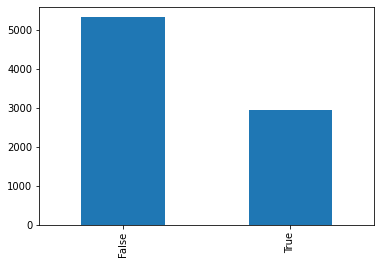

In [4]:
dataset['CryoSleep'].value_counts().plot.bar()

<AxesSubplot:>

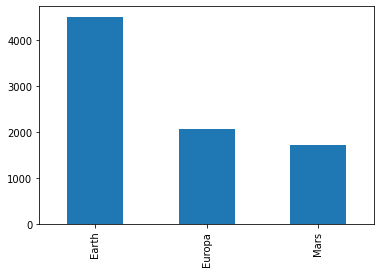

In [5]:
dataset['HomePlanet'].value_counts().plot.bar()

## Split cabin infos

In [6]:
dataset[['Deck', 'RoomNumber', 'Side']] = dataset['Cabin'].str.split('/', expand=True)
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,RoomNumber,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S


<AxesSubplot:>

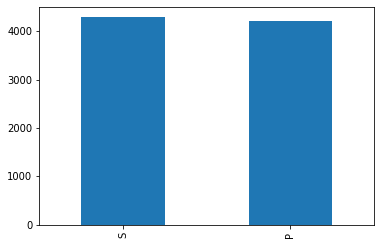

In [7]:
dataset['Side'].value_counts().plot.bar()

<AxesSubplot:>

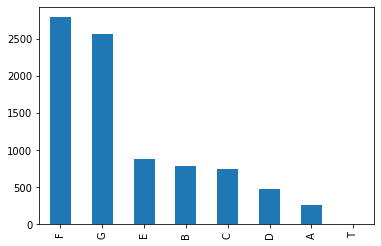

In [8]:
dataset['Deck'].value_counts().plot.bar()

<AxesSubplot:>

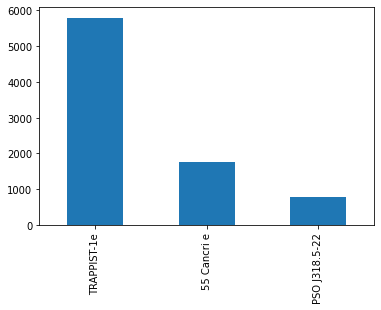

In [9]:
dataset['Destination'].value_counts().plot.bar()

In [10]:
# Convert room number to uint
dataset['RoomNumber'] = pd.to_numeric(dataset['RoomNumber'], downcast='unsigned')

count    8494.000000
mean      600.367671
std       511.867226
min         0.000000
25%       167.250000
50%       427.000000
75%       999.000000
max      1894.000000
Name: RoomNumber, dtype: float64

<AxesSubplot:ylabel='Frequency'>

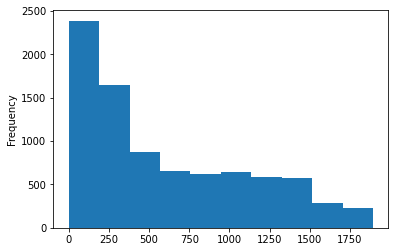

In [11]:
display(dataset['RoomNumber'].describe())
dataset['RoomNumber'].plot.hist()

<AxesSubplot:>

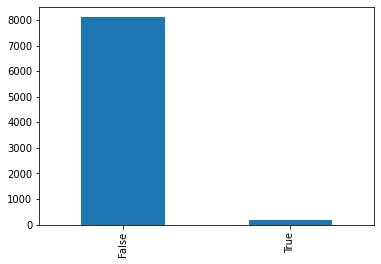

In [12]:
dataset['VIP'].value_counts().plot.bar()

count    8319.000000
mean       28.820411
std        14.488090
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

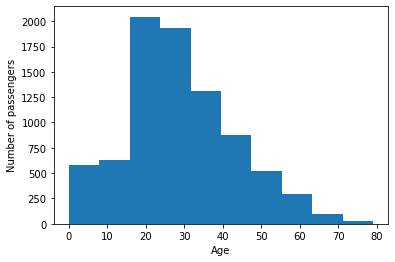

In [13]:
display(dataset['Age'].describe())
plt.hist(dataset['Age'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.show()

## Bivariable analysis

In [14]:
def cat_plot(column):
    fig, ax = plt.subplots()
    value_counts_trans = dataset[dataset['Transported']][column].value_counts()
    value_counts_nottrans = dataset[~dataset['Transported']][column].value_counts()
    labels = value_counts_trans.index.values
    x = np.arange(len(labels))

    width = 0.35
    ax.bar(x - width/2, value_counts_trans.values, width, label='Transported')
    ax.bar(x + width/2, value_counts_nottrans.values, width, label='Not Transported')
    ax.set_xlabel(column)
    ax.set_ylabel('Number of passenger')
    ax.set_xticks(x, labels)
    ax.legend()
    plt.show()
    
def int_plot(column):
    plt.hist([dataset[dataset['Transported']][column], dataset[~dataset['Transported']][column]], label=['Transported', 'Not Transported'])
    plt.xlabel(column)
    plt.ylabel('Number of passenger')
    plt.legend()
    plt.show()
    sns.boxplot(x='Transported',y=column, data=dataset)
    plt.show()

,Side,Transported
Side,1.000000,0.103775
Transported,0.103775,1.000000


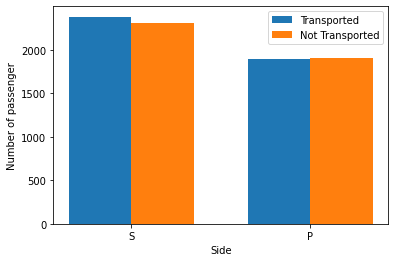

In [15]:
encodedSide = dataset['Side'].map({'P': 0, 'S': 1})
encodedTransported = dataset['Transported'].map({False: 0, True: 1})
display(pd.concat([encodedSide, encodedTransported], axis=1).corr())
pd.crosstab(dataset['Side'], dataset['Transported'])

cat_plot('Side')

A bit more of passengers on starboard were transported but the pearson correlation is very low.


,Deck,Transported
Deck,1.000000,-0.116462
Transported,-0.116462,1.000000


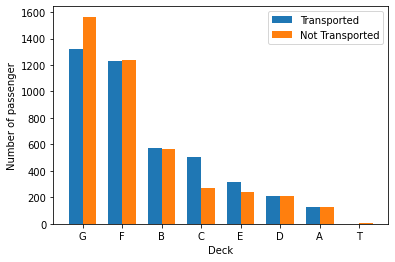

In [16]:
encodedDeck = dataset['Deck'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7})
display(pd.concat([encodedDeck, encodedTransported], axis=1).corr())
pd.crosstab(dataset['Deck'], dataset['Transported'])

cat_plot('Deck')

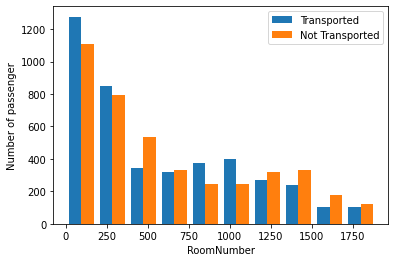

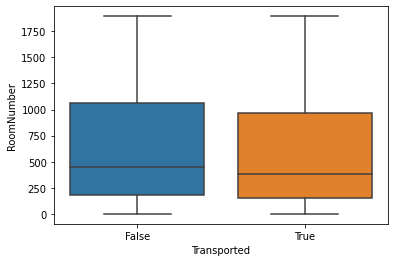

In [17]:
pd.concat([dataset['RoomNumber'], encodedTransported], axis=1).corr()
int_plot('RoomNumber')

,VIP,Transported
VIP,1.000000,-0.035406
Transported,-0.035406,1.000000


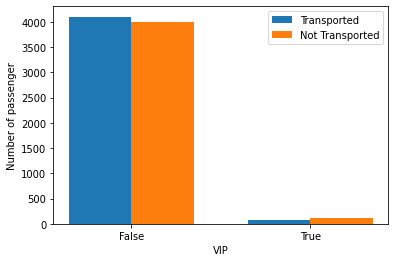

In [18]:
encodedVIP = dataset['VIP'].map({False: 0, True: 1})
display(pd.concat([encodedVIP, encodedTransported], axis=1).corr())
pd.crosstab(dataset['VIP'], dataset['Transported'])

cat_plot('VIP')

,Age,Transported
Age,1.000000,-0.077213
Transported,-0.077213,1.000000


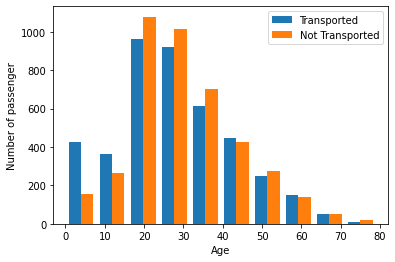

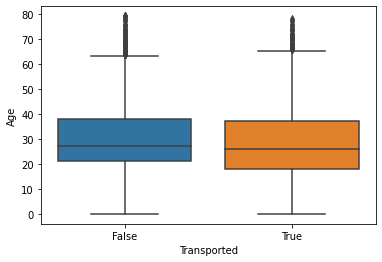

In [19]:
display(pd.concat([dataset['Age'], encodedTransported], axis=1).corr())
int_plot('Age')

,is_child,Transported
is_child,1.000000,0.126101
Transported,0.126101,1.000000


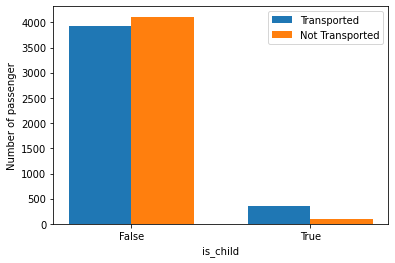

In [20]:
dataset['is_child'] = dataset['Age'] <= 4
display(pd.concat([dataset['is_child'].map({False: 0, True: 1}), encodedTransported], axis=1).corr())
cat_plot('is_child')

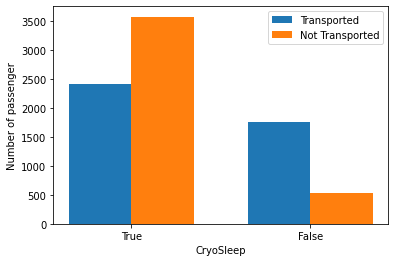

In [21]:
encodedCryo = dataset['CryoSleep'].map({False: 0, True: 1})
cat_plot('CryoSleep')

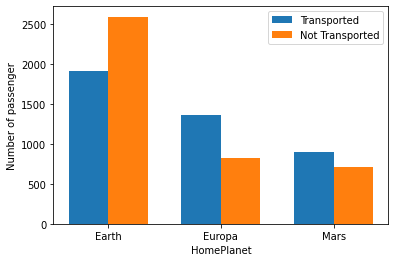

In [22]:
encodedHome = pd.get_dummies(dataset['HomePlanet'])
cat_plot('HomePlanet')

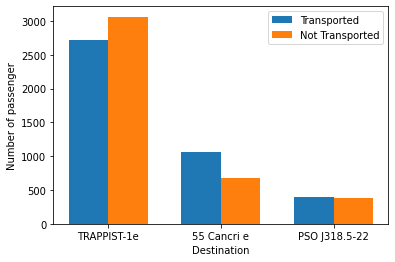

In [23]:
encodedDestination = pd.get_dummies(dataset['Destination'])
cat_plot('Destination')

In [24]:
pd.crosstab(dataset['HomePlanet'], dataset['CryoSleep'])

CryoSleep,False,True
HomePlanet,,
Earth,3051,1346
Europa,1131,882
Mars,1027,654


Analysing RoomService


count    8317.000000
mean      221.954671
std       640.734593
min         0.000000
25%         0.000000
50%         0.000000
75%        48.000000
max      9920.000000
Name: RoomService, dtype: float64

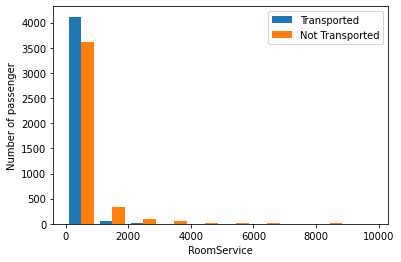

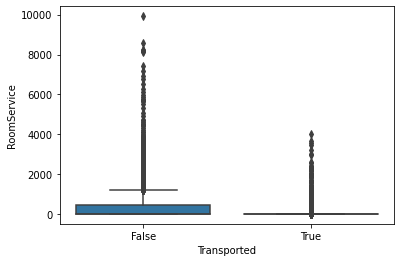

Analysing FoodCourt


count     8316.000000
mean       457.992665
std       1616.551099
min          0.000000
25%          0.000000
50%          0.000000
75%         78.250000
max      29813.000000
Name: FoodCourt, dtype: float64

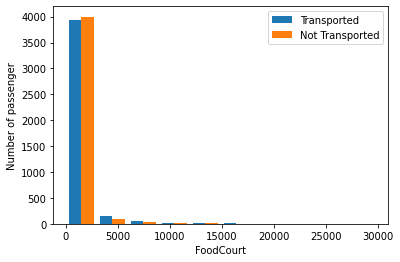

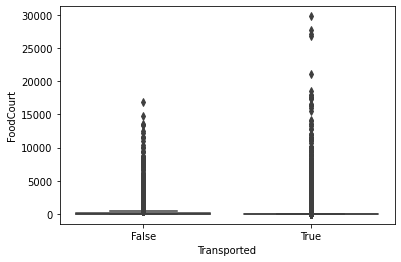

Analysing ShoppingMall


count     8288.000000
mean       174.700531
std        608.668091
min          0.000000
25%          0.000000
50%          0.000000
75%         28.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

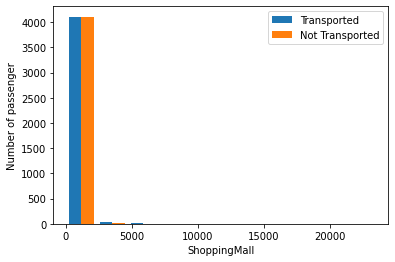

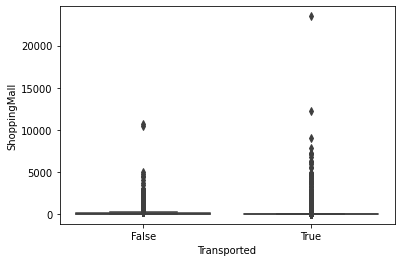

Analysing Spa


count     8313.000000
mean       306.623120
std       1119.076668
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64

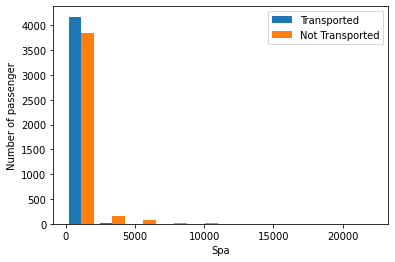

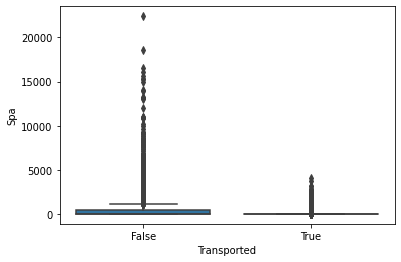

Analysing VRDeck


count     8310.000000
mean       306.132371
std       1148.895082
min          0.000000
25%          0.000000
50%          0.000000
75%         46.750000
max      24133.000000
Name: VRDeck, dtype: float64

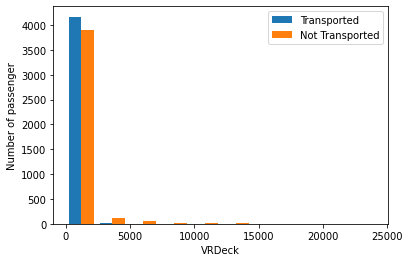

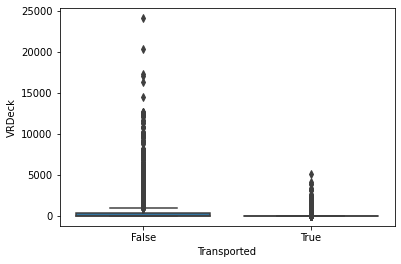

In [25]:
for column in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    print('Analysing', column)
    display(dataset[column].describe())
    int_plot(column)

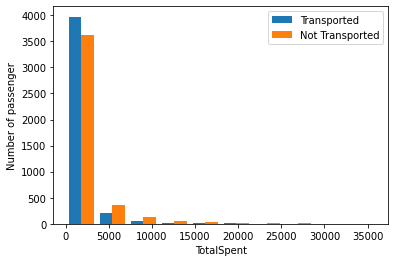

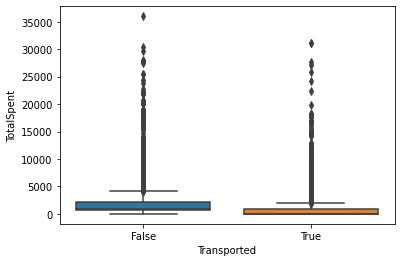

In [26]:
dataset['TotalSpent'] = dataset[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
int_plot('TotalSpent')

## Get most corrolated values

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,RoomNumber,is_child,TotalSpent,Deck,Side,VIP,CryoSleep,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
Age,1.000000,0.070586,0.129999,0.034103,0.122365,0.101069,-0.077213,-0.132255,-0.453666,0.186249,-0.248003,0.011640,0.092592,-0.073938,-0.198902,0.217664,0.015660,0.015220,-0.026270,-0.001608
RoomService,0.070586,1.000000,-0.018380,0.054638,0.013700,-0.020419,-0.248758,-0.008986,-0.082366,0.229522,-0.026783,-0.012290,0.045832,-0.258782,-0.140647,-0.076557,0.258430,-0.027479,-0.064868,0.064925
FoodCourt,0.129999,-0.018380,1.000000,-0.013322,0.217284,0.224099,0.048559,-0.183429,-0.067529,0.745822,-0.324348,0.020149,0.129402,-0.209967,-0.210271,0.369000,-0.125779,0.137901,-0.065637,-0.076059
ShoppingMall,0.034103,0.054638,-0.013322,1.000000,0.016051,-0.007186,0.011862,0.001727,-0.068210,0.225656,-0.032926,-0.020983,0.016453,-0.211642,-0.070569,-0.018109,0.109675,-0.011286,-0.031084,0.030813
Spa,0.122365,0.013700,0.217284,0.016051,1.000000,0.155826,-0.220264,-0.131342,-0.065397,0.593310,-0.229111,0.002031,0.058722,-0.203376,-0.155163,0.266356,-0.088285,0.076814,-0.055340,-0.034944
VRDeck,0.101069,-0.020419,0.224099,-0.007186,0.155826,1.000000,-0.207645,-0.139080,-0.063460,0.588282,-0.257326,-0.008154,0.126290,-0.198232,-0.154437,0.286405,-0.113899,0.093072,-0.047447,-0.048123
Transported,-0.077213,-0.248758,0.048559,0.011862,-0.220264,-0.207645,1.000000,-0.045097,0.126101,-0.196387,-0.116462,0.103775,-0.035406,0.467484,-0.168415,0.176303,0.020332,0.107480,0.003396,-0.096084
RoomNumber,-0.132255,-0.008986,-0.183429,0.001727,-0.131342,-0.139080,-0.045097,1.000000,0.059152,-0.213494,0.531449,-0.037996,-0.099416,-0.037560,0.366109,-0.489880,0.062596,-0.142101,0.105092,0.058457
is_child,-0.453666,-0.082366,-0.067529,-0.068210,-0.065397,-0.063460,0.126101,0.059152,1.000000,-0.122751,0.153308,0.001351,-0.036738,0.084113,0.077904,-0.104976,0.018627,0.002381,-0.012407,0.011860
TotalSpent,0.186249,0.229522,0.745822,0.225656,0.593310,0.588282,-0.196387,-0.213494,-0.122751,1.000000,-0.391983,0.001998,0.160794,-0.382184,-0.289714,0.408798,-0.070279,0.137423,-0.099177,-0.055323


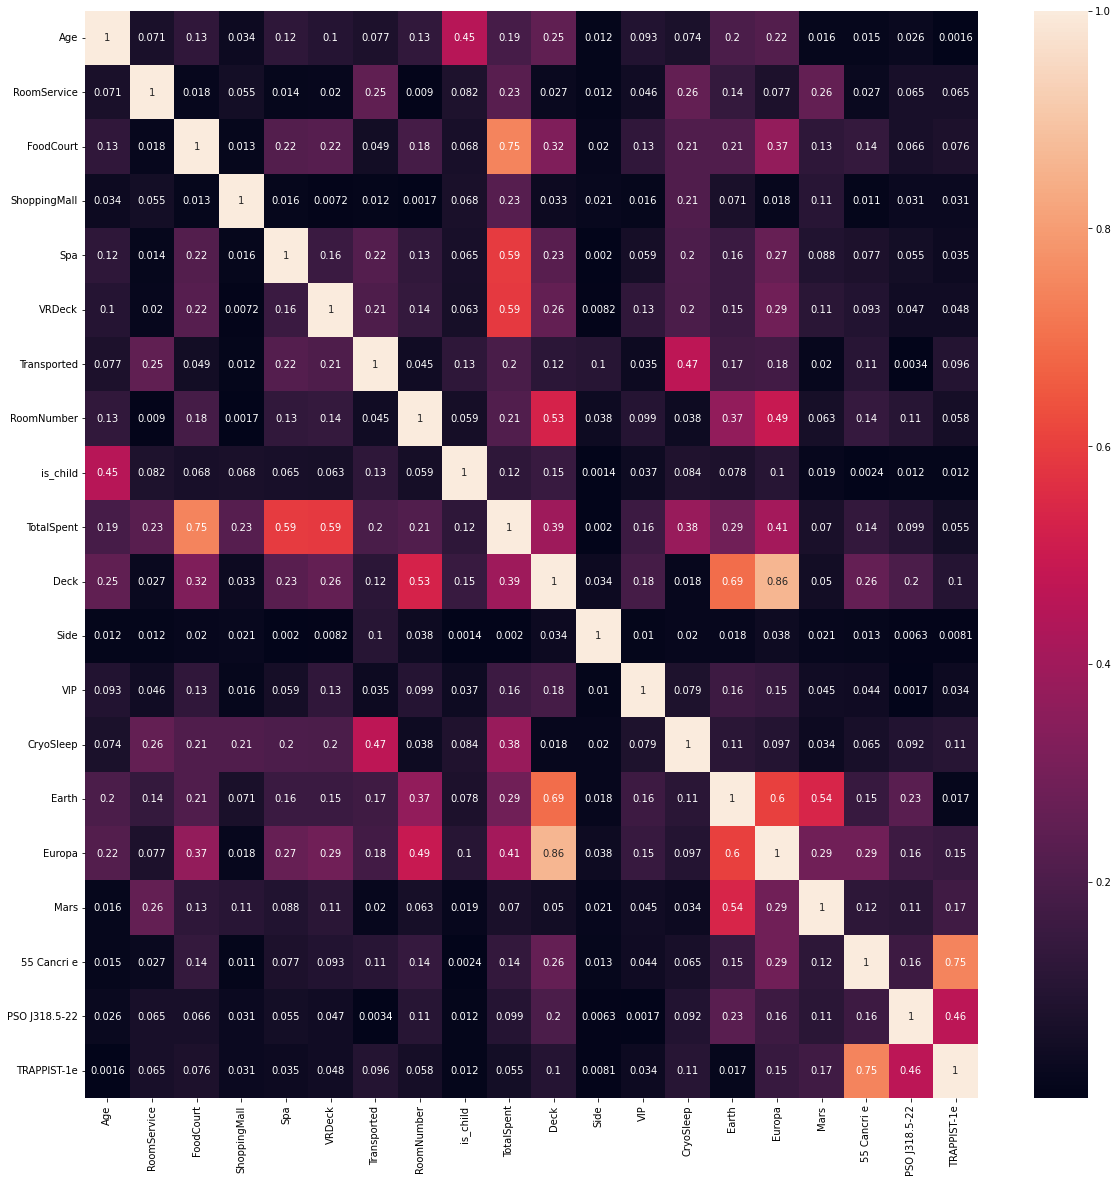

Most corrolated values to Transported
CryoSleep      0.467484
RoomService    0.248758
Spa            0.220264
VRDeck         0.207645
TotalSpent     0.196387
Europa         0.176303
Earth          0.168415
is_child       0.126101
Deck           0.116462
55 Cancri e    0.107480
Name: Transported, dtype: float64


In [27]:
correlationMatrix = pd.concat([dataset, encodedDeck, encodedSide, encodedVIP, encodedCryo, encodedHome, encodedDestination], axis=1).corr()
display(correlationMatrix)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlationMatrix.abs(), annot=True, ax=ax)
plt.show()
print('Most corrolated values to Transported')
print(correlationMatrix['Transported'].drop('Transported').abs().sort_values(ascending=False)[0:10])

# Model selection

## Load test data

In [28]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

## Try models

In [29]:
models = []

In [30]:
#selected_columns = ['PassengerId', 'CryoSleep', 'TotalSpent', 'HomePlanet', 'Cabin', 'Age', 'Destination']
selected_columns = ['PassengerId', 'CryoSleep', 'RoomService', 'Spa', 'VRDeck', 'HomePlanet', 'Cabin', 'Age', 'Destination']
removed_columns = ['Cabin', 'PassengerId', 'RoomNumber']
cat_columns = ['CryoSleep', 'HomePlanet', 'Deck', 'Side', 'Destination', 'Destination', 'group_number']
num_columns = ['RoomService', 'Spa', 'VRDeck', 'Age']

def feature_engineering(dataset):
    df = dataset.copy()
    df[['Deck', 'RoomNumber', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df['group_number'] = df['PassengerId'].str.split('_', expand=True)[1]
    #df["is_child"] = df['Age'] <= 4
    df.drop(columns=removed_columns, inplace=True)
    return df
            

def createPipeline(clf):
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
        ('onehot', OneHotEncoder(drop='first'))
    ])
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ])

    return Pipeline([
        ('feature selection', FunctionTransformer(lambda x: x[selected_columns])),
        ('feature engineering', FunctionTransformer(feature_engineering)),
        ('preprocessor', preprocessor),
        ('estimator', clf)
    ])

labelEnc = LabelEncoder()
labelEnc.fit([True, False])
X = dataset.drop(columns=['Transported']).dropna()
y = labelEnc.transform(dataset.loc[X.index]['Transported'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [31]:
logreg = createPipeline(LogisticRegression(random_state=1337, max_iter=1e4))
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

params = [dict(
    estimator__penalty = ['l1'],
    estimator__C = np.logspace(0, 2, 3),
    estimator__solver = ['liblinear', 'saga'],
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
), dict(
    estimator__penalty = ['l2'],
    estimator__C = np.logspace(0, 2, 3),
    estimator__solver = ['newton-cg', 'lbfgs'],
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
    
), dict(
    estimator__penalty = ['elasticnet'],
    estimator__C = np.logspace(0, 2, 3),
    estimator__solver = ['saga'],
    estimator__l1_ratio = np.linspace(0,1, 5),
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
)]
cv = GridSearchCV(logreg, params)
cv.fit(X_train, y_train)
print(cv.best_params_, cv.best_score_)
models.append((cv, cv.best_score_))
# {'estimator__C': 1.0, 'estimator__l1_ratio': 0.5, 'estimator__penalty': 'elasticnet', 'estimator__solver': 'saga'} 0.7878508356985179

{'estimator__C': 1.0, 'estimator__l1_ratio': 0.5, 'estimator__penalty': 'elasticnet', 'estimator__solver': 'saga', 'preprocessor__num__scaler': StandardScaler()} 0.7878517316017317


## Random Forest

In [32]:
rf = createPipeline(RandomForestClassifier(random_state=42))
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
rf['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out()
rf._final_estimator.feature_importances_

0.7791225416036308


array([1.42853865e-01, 1.62284043e-01, 1.52897503e-01, 2.15452576e-01,
       1.03831031e-01, 3.07459004e-02, 1.91713142e-02, 9.57500215e-03,
       1.05406209e-02, 5.53664690e-03, 1.39565612e-02, 1.67096577e-02,
       1.68409329e-02, 9.69108159e-05, 2.62543855e-02, 5.38800799e-03,
       9.52421932e-03, 5.07246495e-03, 8.51129126e-03, 1.71315904e-02,
       9.62091783e-03, 7.48856105e-03, 4.60741081e-03, 3.00233405e-03,
       1.95624030e-03, 9.50011469e-04])

In [33]:
params = dict(
    estimator__max_features = ['sqrt', 'log2'],
    estimator__n_estimators = np.arange(100, 150, 10),
    estimator__min_samples_split = np.arange(2, 5, 1),
    estimator__criterion = ['gini', 'entropy'],
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
)
rfcv = GridSearchCV(rf, params)
rfcv.fit(X_train, y_train)
print(rfcv.best_params_, rfcv.best_score_)
models.append((rfcv, rfcv.best_score_))
# {'estimator__criterion': 'gini', 'estimator__max_features': 'sqrt', 'estimator__min_samples_split': 4, 'estimator__n_estimators': 120} 0.7954231888420631

{'estimator__criterion': 'gini', 'estimator__max_features': 'sqrt', 'estimator__min_samples_split': 4, 'estimator__n_estimators': 120, 'preprocessor__num__scaler': StandardScaler()} 0.7922054628594364


## Gradient boosting

In [34]:
gb = createPipeline(GradientBoostingClassifier(random_state=42))
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

params = dict(
    estimator__learning_rate = np.logspace(-3, -1, 3),
    estimator__n_estimators = np.arange(100, 150, 10),
    estimator__max_depth = np.arange(1, 7, 2),
    estimator__loss = ['deviance', 'exponential'],
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
)
gbcv = GridSearchCV(gb, params)
gbcv.fit(X_train, y_train)
print(gbcv.best_params_, gbcv.best_score_)
models.append((gbcv, gbcv.best_score_))

# {'estimator__learning_rate': 0.1, 'estimator__loss': 'deviance', 'estimator__max_depth': 3, 'estimator__n_estimators': 100} 0.799020061064763

{'estimator__learning_rate': 0.1, 'estimator__loss': 'exponential', 'estimator__max_depth': 3, 'estimator__n_estimators': 130, 'preprocessor__num__scaler': StandardScaler()} 0.8028036395172157


In [35]:
xg = createPipeline(XGBClassifier(tree_method='hist', objective='binary:logistic', use_label_encoder=False, enable_categorical=True, max_leaves=0))
xg.fit(X_train, y_train)

params = dict(
    estimator__learning_rate = [0.023999999999999997], #np.arange(0.0235, 0.0242, 0.0001)
    estimator__n_estimators = [680], #np.arange(679, 681, 1), 
    estimator__max_depth = [4], #np.arange(4, 10, 2),
    estimator__grow_policy = ['depthwise'],
    estimator__colsample_bytree = [0.66], #np.arange(0.66, 0.67, 0.001),
    estimator__gamma = [0.45], #np.arange(0.40, 0.5, 0.01),
    estimator__min_child_weight = [0.39999999999999997], #np.arange(0.3, 0.5, 0.05),#[0.2781624502349287],
    estimator__subsample = [0.5], #np.arange(0.4, 0.6, 0.05),#[0.9717120953891037], 
)
#params = {'colsample_bytree': 0.6659223566174967,
#          'gamma': 0.29564889385386356,
#          'learning_rate': 0.027472179299006416,
#          'max_depth': 4,
#          'min_child_weight': 0.2781624502349287,
#          'n_estimators': 712,
#          'subsample': 0.9717120953891037}
xgcv = GridSearchCV(xg, params)
xgcv.fit(X_train, y_train)
print(xgcv.best_params_, xgcv.best_score_)
models.append((xgcv, xgcv.best_score_))
# {'estimator__colsample_bytree': 0.6659223566174967, 'estimator__gamma': 0.29564889385386356, 'estimator__grow_policy': 'depthwise', 'estimator__learning_rate': 0.027472179299006416, 'estimator__max_depth': 4, 'estimator__min_child_weight': 0.2781624502349287, 'estimator__n_estimators': 712, 'estimator__subsample': 0.9717120953891037, 'preprocessor__num__scaler': StandardScaler()} 0.8007217396290244

{'estimator__colsample_bytree': 0.66, 'estimator__gamma': 0.45, 'estimator__grow_policy': 'depthwise', 'estimator__learning_rate': 0.023999999999999997, 'estimator__max_depth': 4, 'estimator__min_child_weight': 0.39999999999999997, 'estimator__n_estimators': 680, 'estimator__subsample': 0.5} 0.8046963246466557


## SVM

In [36]:
from sklearn.svm import SVC
svm = createPipeline(SVC(random_state=42))
svm.fit(X_train, y_train)

params = dict(
    estimator__C = np.logspace(0, 2, 3),
    estimator__kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
)
svmcv = GridSearchCV(svm, params)
svmcv.fit(X_train, y_train)
print(svmcv.best_params_, svmcv.best_score_)
models.append((svmcv, svmcv.best_score_))

# {'estimator__C': 1.0, 'estimator__kernel': 'rbf'} 0.8016670967002092

{'estimator__C': 1.0, 'estimator__kernel': 'rbf', 'preprocessor__num__scaler': StandardScaler()} 0.7956134786846707


## SGD

In [37]:
from sklearn.linear_model import SGDClassifier
sgd = createPipeline(SGDClassifier(random_state=42))
sgd.fit(X_train, y_train)
print(sgd.score(X_test, y_test))

params = [dict(
    estimator__penalty = ['l1'],
    estimator__alpha = np.logspace(-5, -3, 3),
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
), dict(
    estimator__penalty = ['l2'],
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
    
), dict(
    estimator__penalty = ['elasticnet'],
    estimator__alpha = np.logspace(-5, -3, 3),
    estimator__l1_ratio = np.arange(0.1, 0.9, 0.2),
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
)]
sgdcv = GridSearchCV(sgd, params)
sgdcv.fit(X_train, y_train)
print(sgdcv.best_params_, sgdcv.best_score_)
models.append((sgdcv, sgdcv.best_score_))

# {'estimator__alpha': 0.0001, 'estimator__l1_ratio': 0.1, 'estimator__penalty': 'elasticnet'} 0.7901239213325306

0.7632375189107413
{'estimator__alpha': 0.0001, 'estimator__penalty': 'l1', 'preprocessor__num__scaler': MinMaxScaler()} 0.7874745563487286


## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = createPipeline(KNeighborsClassifier())
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

params = dict(
    estimator__n_neighbors = np.linspace(3, 9, 4, dtype='int32'),
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
)
knncv = GridSearchCV(knn, params)
knncv.fit(X_train, y_train)
print(knncv.best_params_, knncv.best_score_)
models.append((knncv, knncv.best_score_))
# {'estimator__n_neighbors': 7} 0.7810410753705456

0.7632375189107413
{'estimator__n_neighbors': 5, 'preprocessor__num__scaler': StandardScaler()} 0.7749824402970098


## Naives Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = createPipeline(GaussianNB())
gnb.fit(X_train, y_train)
print(gnb.score(X_test, y_test))

params = dict(
    estimator__var_smoothing = np.logspace(-8, -10, 3),
    preprocessor__num__scaler = [StandardScaler(), MinMaxScaler()]
)
gnb = GridSearchCV(gnb, params)
gnb.fit(X_train, y_train)
print(gnb.best_params_, gnb.best_score_)
models.append((gnb, gnb.best_score_))
# {'estimator__var_smoothing': 1e-08} 0.7132885740087727

0.716338880484115
{'estimator__var_smoothing': 1e-08, 'preprocessor__num__scaler': StandardScaler()} 0.7032553539176056


## Analyse false prediction

In [40]:
pred = svmcv.predict(X)
df = dataset.loc[X.index]
wrong_pred = df[df['Transported'] != pred]
wrong_pred

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,RoomNumber,Side,is_child,TotalSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,False,736.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,False,1091.0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,F,0,P,False,774.0
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,E,0,S,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,9254_01,Earth,True,G/1502/P,PSO J318.5-22,61.0,False,0.0,0.0,0.0,0.0,0.0,Kenny Mallerez,False,G,1502,P,False,0.0
8676,9261_01,Earth,True,G/1504/P,PSO J318.5-22,22.0,False,0.0,0.0,0.0,0.0,0.0,Therta Casentry,False,G,1504,P,False,0.0
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True,G,1507,P,False,992.0
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False,A,97,P,False,1231.0


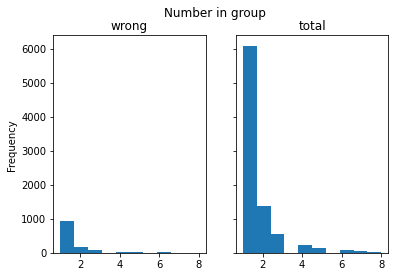

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.suptitle('Number in group')
for id, d in enumerate([wrong_pred, dataset]):
    id_num = d['PassengerId'].str.split('_', expand=True)[1]
    id_num.astype('int32').plot.hist(ax=ax1 if id == 0 else ax2, title='wrong' if id == 0 else 'total')
    
plt.show()

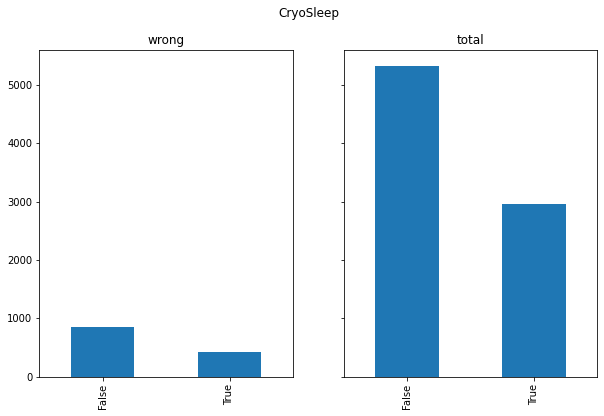

False in wrong: 0.6750590086546027
False in dataset: 0.6276194961149046
True in wrong: 0.32494099134539733
True in dataset: 0.34765716976689426


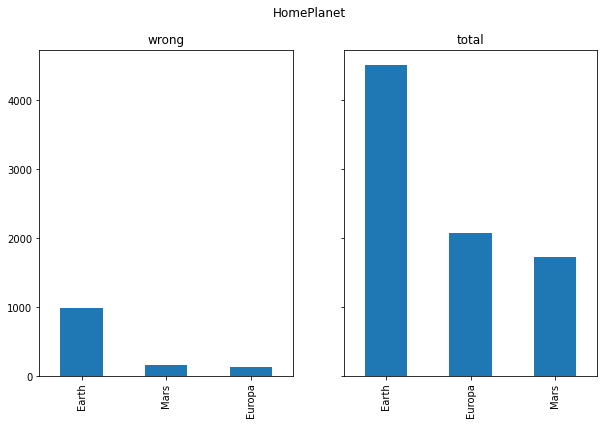

Earth in wrong: 0.7741935483870968
Earth in dataset: 0.5306098422415823
Mars in wrong: 0.12037765538945712
Mars in dataset: 0.20273133976924887
Europa in wrong: 0.1054287962234461
Europa in dataset: 0.2437014363079821


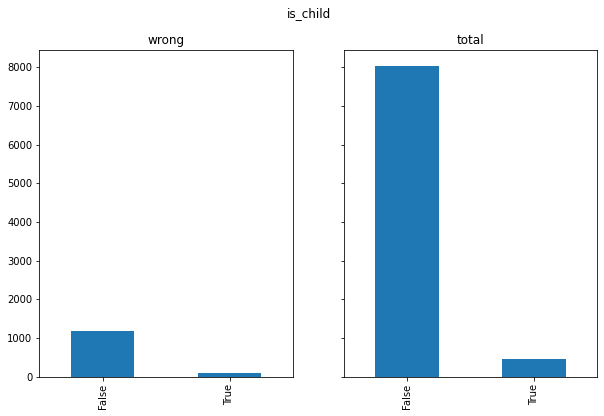

False in wrong: 0.932336742722266
False in dataset: 0.9461973157522957
True in wrong: 0.06766325727773406
True in dataset: 0.05380268424770426


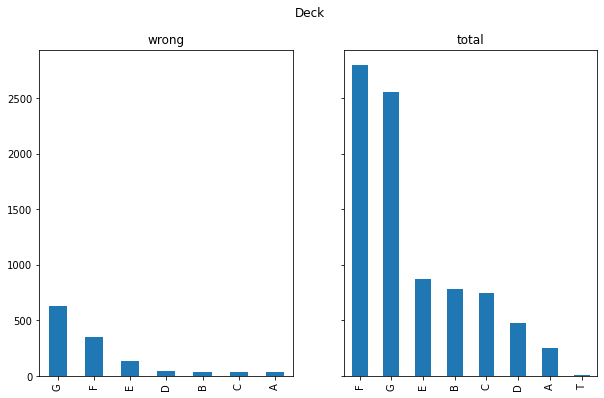

G in wrong: 0.4925255704169945
G in dataset: 0.30127148575465035
F in wrong: 0.2753737214791503
F in dataset: 0.32893807393454205
E in wrong: 0.10700236034618411
E in dataset: 0.1031316223216388
D in wrong: 0.03697875688434304
D in dataset: 0.05627501765952437
B in wrong: 0.03068450039339103
B in dataset: 0.09171179656227925
C in wrong: 0.03068450039339103
C in dataset: 0.08794443136331528
A in wrong: 0.02675059008654603
A in dataset: 0.030138921591711797


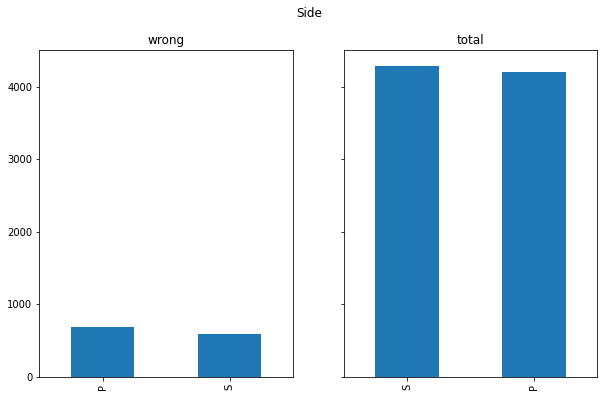

P in wrong: 0.5342250196695515
P in dataset: 0.49517306333882743
S in wrong: 0.46577498033044845
S in dataset: 0.5048269366611726


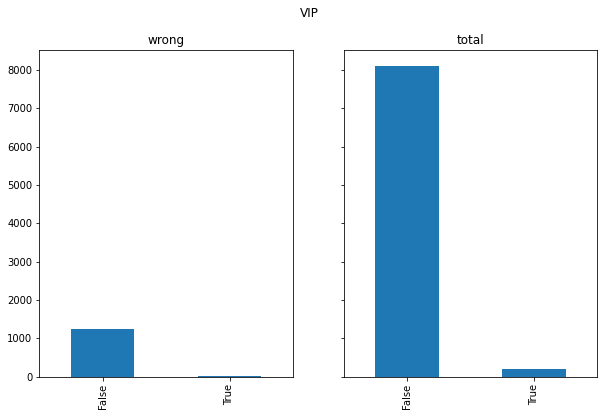

False in wrong: 0.983477576711251
False in dataset: 0.9540852366376266
True in wrong: 0.016522423288749016
True in dataset: 0.022721921356251472


In [42]:
# TODO compare with true predictions
for col in ['CryoSleep', 'HomePlanet', 'is_child', 'Deck', 'Side', 'VIP']:
    wvc = wrong_pred[col].value_counts()
    dvc = dataset[col].value_counts()
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))
    fig.suptitle(col)
    wvc.plot.bar(ax=ax1, title='wrong')
    dvc.plot.bar(ax=ax2, title='total')
    plt.show()
    for idx in wvc.index:
        print(f'{idx} in wrong: {wvc[idx] / wrong_pred.shape[0]}')
        print(f'{idx} in dataset: {dvc[idx] / dataset.shape[0]}')
    

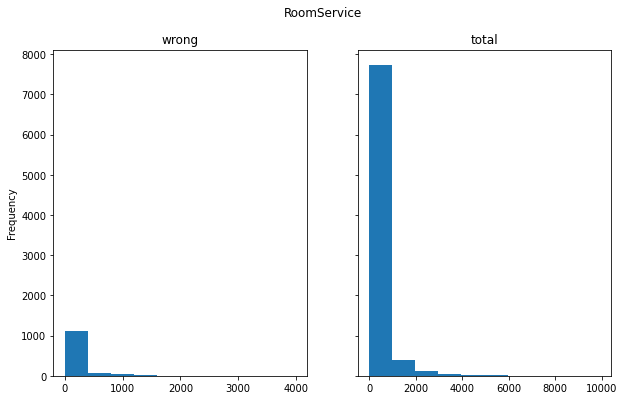

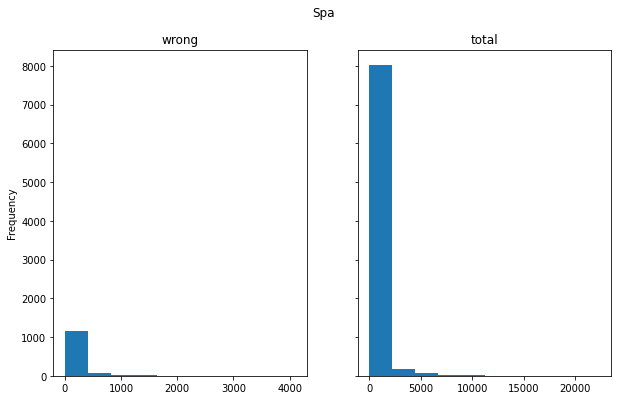

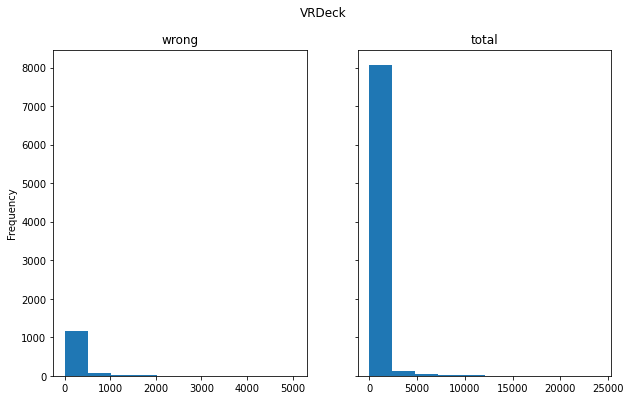

In [43]:
for col in ['RoomService', 'Spa', 'VRDeck']:
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))
    fig.suptitle(col)
    wrong_pred[col].plot.hist(ax=ax1, title='wrong')
    dataset[col].plot.hist(ax=ax2, title='total')
    plt.show()

## Oversampling

In [44]:
earth_sample = X_train[X_train['HomePlanet'] == 'Earth'].sample(frac=0.5)
y_sample = labelEnc.transform(dataset.loc[earth_sample.index]['Transported'])
X_overs = pd.concat([X_train, earth_sample])
y_overs = np.concatenate([y_train, y_sample])
svmcv.fit(X_overs, y_overs)
print(svmcv.best_params_, svmcv.best_score_)

{'estimator__C': 10.0, 'estimator__kernel': 'rbf', 'preprocessor__num__scaler': StandardScaler()} 0.7914010484490299


# Create submission

In [45]:
best_model = sorted(models, key=lambda x: x[1], reverse=True)[0][0]

In [46]:
pred = labelEnc.inverse_transform(best_model.predict(test))
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': pred})
submission.to_csv('./submission.csv', index=False)

# TODO

Pour chaque algo, regarder les lignes mal prédites et rechercher des particularités communes à tous les algos.

Essayer d'autres méthodes d'imputation que la médiane pour le meilleur algo. Vérifier par colonne, peut-être que certaines seront mieux jetées.

Pour les variables catégorielles, regarder s'il y a assez d'individus par classe.

## Pistes
On peut essayer une stratégie d'oversampling qui consiste à dupliquer les lignes comportants une variable mal prédite pour mieux entrainer le modèle dessus.